# Wordle Reinforcement Experiments

## Imports and Config

In [17]:
import sys
sys.path.append('../..')

In [19]:
import src.config as config
from src.models import qlearn

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Config Changes

In [31]:
epsilon = 0.8 #For epsilon greedy learning
gamma = 0.6 #Discount factor
trials = 1000

In [21]:
# Rewards

config.WIN_REWARD = 30
config.LOSE_REWARD = -10
config.GREEN_REWARD = 5
config.YELLOW_REWARD = 3
config.GREY_REWARD = -1

## Q - Learning

In [32]:
config = {'epsilon': epsilon, 'gamma': gamma}
qmodel = qlearn.QLearn(config)

In [33]:
qmodel.train(trials)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:50<00:00,  2.85it/s]


Text(0.5, 1.0, 'Games solved: 103/1000')

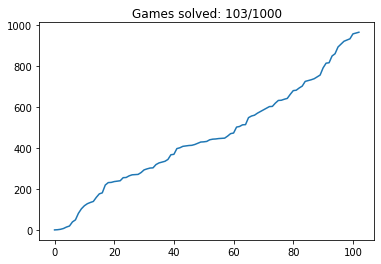

In [37]:
games_solved = qmodel.games_solved
plt.plot(list(range(len(games_solved))), games_solved)
plt.title(f'Games solved: {len(games_solved)}/{trials}')

In [62]:
q_table = qmodel.Q
actions = pd.DataFrame(columns=['# Green', '# Yellow', 'Game State', 'Action'])
print(f'Q values shape: {q_table.shape}') #Num green, Num yellow, game step, action
q_actions = np.argmax(q_table, axis=3)
for green in range(src.config.WORD_LENGTH):
    for yellow in range(src.config.WORD_LENGTH-green):
        for state in range(src.config.GAME_LENGTH):
            action = qmodel.strategies[q_actions[green, yellow, state]].__class__.__name__[:-8]
            actions = actions.append({'# Green': green, '# Yellow': yellow, 'Game State': state, 'Action': action}, ignore_index=True)
actions.pivot(index=['# Green', '# Yellow'], columns=['Game State'], values=['Action'])
            

Q values shape: (6, 6, 7, 4)


Action                                                  \
Game State                0               1               2               3   
# Green # Yellow                                                              
0       0         HighestLL  HighestLLSmart          Random       HighestLL   
        1            Random       HighestLL  HighestLLSmart    FreshLetters   
        2            Random    FreshLetters       HighestLL    FreshLetters   
        3            Random    FreshLetters    FreshLetters       HighestLL   
        4            Random          Random       HighestLL  HighestLLSmart   
1       0            Random       HighestLL       HighestLL       HighestLL   
        1            Random    FreshLetters          Random       HighestLL   
        2            Random    FreshLetters  HighestLLSmart          Random   
        3            Random          Random  HighestLLSmart    FreshLetters   
2       0            Random  HighestLLSmart       HighestLL       HighestLL   
        1            Random          Random    FreshLetters       HighestLL   
        2            Random          Random       HighestLL       HighestLL   
3       0            Random       HighestLL  HighestLLSmart       HighestLL   
        1            Random    FreshLetters          Random  HighestLLSmart   
4       0            Random       HighestLL  HighestLLSmart  HighestLLSmart   

                                                  
Game State                     4               5  
# Green # Yellow                                  
0       0           FreshLetters    FreshLetters  
        1           FreshLetters          Random  
        2              HighestLL  HighestLLSmart  
        3         HighestLLSmart          Random  
        4         HighestLLSmart          Random  
1       0         HighestLLSmart    FreshLetters  
        1                 Random       HighestLL  
        2              HighestLL    FreshLetters  
        3           FreshLetters  HighestLLSmart  
2       0                 Random    FreshLetters  
        1           FreshLetters  HighestLLSmart  
        2                 Random       HighestLL  
3       0              HighestLL       HighestLL  
        1                 Random          Random  
4       0         HighestLLSmart  HighestLLSmart

In [64]:
qmodel.test()

++++++++++++++++++++++++++++++
S O R E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
S O R E S 
S A N E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
S O R E S 
S A N E S 
S O N E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
S O R E S 
S A N E S 
S O N E S 
S O R E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
S O R E S 
S A N E S 
S O N E S 
S O R E S 
S E R E S 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

++++++++++++++++++++++++++++++
S O R E S 
S A N E S 
S O N E S 
S O R E S 
S E R E S 
C I P P I 

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

{'solved': False}
